In [1]:
import pandas as pd  # For data manipulation
import numpy as np  # For statistical operations
from matplotlib import pyplot as plt  # For basic data visualizations

In [2]:
# Importing the dataset from CSV file
df = pd.read_csv('death-rates-from-air-pollution.csv')

In [3]:
# Viewing the first five rows of the dataset
df.head()

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
0,Afghanistan,AFG,1990,299.477309,250.362910,46.446589,5.616442
1,Afghanistan,AFG,1991,291.277967,242.575125,46.033841,5.603960
2,Afghanistan,AFG,1992,278.963056,232.043878,44.243766,5.611822
3,Afghanistan,AFG,1993,278.790815,231.648134,44.440148,5.655266
4,Afghanistan,AFG,1994,287.162923,238.837177,45.594328,5.718922


In [4]:
# For each column, totaling the number of rows with missing values
df.isna().sum()

Entity                                               0
Code                                               980
Year                                                 0
Air pollution (total) (deaths per 100,000)           0
Indoor air pollution (deaths per 100,000)            0
Outdoor particulate matter (deaths per 100,000)      0
Outdoor ozone pollution (deaths per 100,000)         0
dtype: int64

In [5]:
# Filtering the dataset to only rows with missing 'Code' values, then viewing each unique 'Entity' value
df[df['Code'].isna()]['Entity'].unique()

array(['Andean Latin America', 'Australasia', 'Caribbean', 'Central Asia',
       'Central Europe',
       'Central Europe, Eastern Europe, and Central Asia',
       'Central Latin America', 'Central Sub-Saharan Africa', 'East Asia',
       'Eastern Europe', 'Eastern Sub-Saharan Africa', 'England',
       'High SDI', 'High-income', 'High-income Asia Pacific',
       'High-middle SDI', 'Latin America and Caribbean', 'Low SDI',
       'Low-middle SDI', 'Middle SDI', 'North Africa and Middle East',
       'North America', 'Northern Ireland', 'Oceania', 'Scotland',
       'South Asia', 'Southeast Asia',
       'Southeast Asia, East Asia, and Oceania', 'Southern Latin America',
       'Southern Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Tropical Latin America', 'Wales', 'Western Europe',
       'Western Sub-Saharan Africa'], dtype=object)

We see that the rows missing a 'Code' value are not countries at all, but rather different categorizations of other countries in the dataset. To clean this data, these rows should be moved into their own datasets as including them will result in counting the same observations multiple times.

To accomplish this, we should first manually create lists containing related 'Entity' values. At a glance, these should include region, constituent countries (for the UK), income, and SDI (Silt Density Index).

In [6]:
region = ['Andean Latin America', 'Australasia', 'Caribbean', 'Central Asia', 'Central Europe', 
          'Central Europe, Eastern Europe, and Central Asia', 'Central Latin America', 
          'Central Sub-Saharan Africa', 'East Asia', 'Eastern Europe', 'Eastern Sub-Saharan Africa',
          'Latin America and Caribbean', 'North Africa and Middle East', 'North America', 
          'Oceania', 'Scotland', 'South Asia', 'Southeast Asia', 'Southeast Asia, East Asia, and Oceania',
          'Southern Latin America', 'Southern Sub-Saharan Africa','Sub-Saharan Africa', 
          'Tropical Latin America', 'Western Europe', 'Western Sub-Saharan Africa']
constituent_country = ['England', 'Northern Ireland', 'Wales']
income = ['High-income', 'High-income Asia Pacific']
sdis = ['High SDI', 'High-middle SDI', 'Middle SDI', 'Low-middle SDI', 'Low SDI']

Note that some countries may fall into more than one of the regions, but for the purpose of exploratory analysis it may still be beneficial to include them all at this point.

With these lists identified, we can proceed to copy them into their own dataframes and drop the 'Code' column which is not applicable to these entries.

In [7]:
# Creating a new dataframe for the different regions
regions = df[df['Entity'].isin(region)].copy(deep=True)
# Dropping the 'Code' column
regions.drop('Code', axis=1, inplace=True)

# Creating a new dataframe for the constituent countries
constituent_countries = df[df['Entity'].isin(constituent_country)].copy(deep=True)
# Dropping the 'Code' column
constituent_countries.drop('Code', axis=1, inplace=True)

# Creating a new dataframe for the different high-income countries
high_income = df[df['Entity'].isin(income)].copy(deep=True)
# Dropping the 'Code' column
high_income.drop('Code', axis=1, inplace=True)

# Creating a new dataframe from the different SDI levels
sdi = df[df['Entity'].isin(sdis)].copy(deep=True)
# Dropping the 'Code' column
sdi.drop('Code', axis=1, inplace=True)

In [8]:
# Copying the original dataframe
countries = df.copy(deep=True)
# Dropping the rows with missing values
countries.dropna(inplace=True)

With our original data split logically into multiple dataframes, we'll now perform one last check to ensure no missing values remain.

In [9]:
# First summing the number of missing values from each dataframe, then adding those values together
print('Total Number of Missing Values:', \
      sum(countries.isna().sum().values) + \
      sum(regions.isna().sum().values) + \
      sum(constituent_countries.isna().sum().values) + \
      sum(high_income.isna().sum().values) + \
      sum(sdi.isna().sum().values)
     )

Total Number of Missing Values: 0


Our data is now clean and organized. We can continue our analysis.



Visualization¶

To begin, we will plot simple line graphs of total deaths and deaths by air pollution type.

/var/folders/v4/xgc8jrh510g08njwg__q53b80000gn/T/ipykernel_23670/3609810444.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(countries.groupby('Year').mean().iloc[:,0])  # Creating the plot
/var/folders/v4/xgc8jrh510g08njwg__q53b80000gn/T/ipykernel_23670/3609810444.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(countries.groupby('Year').mean().iloc[:,1], label='Indoor')  # Adding a line for indoor deaths
/var/folders/v4/xgc8jrh510g08njwg__q53b80000gn/T/ipykernel_23670/3609810444.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a fu

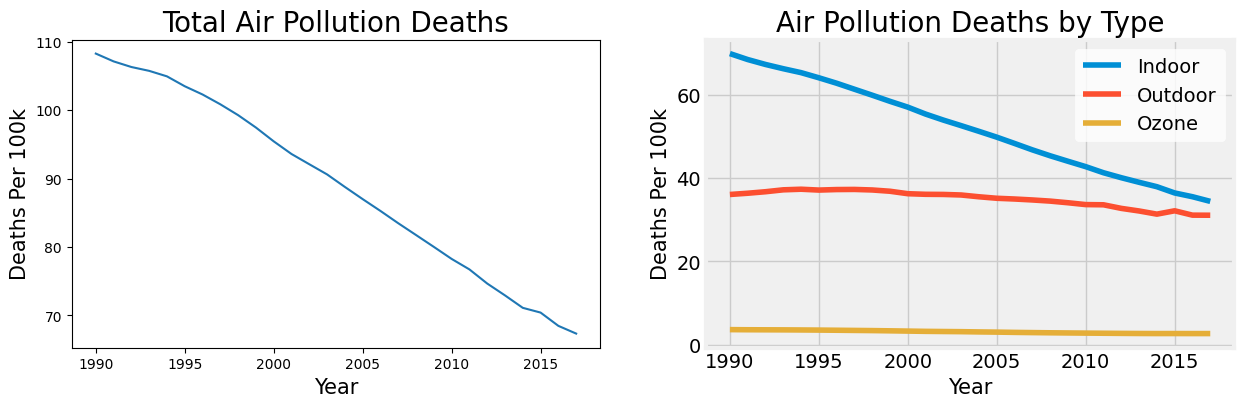

In [10]:
plt.figure(figsize=(15,4))  # Increasing the plot size

plt.subplot(1,2,1)  # Specifiying which subplot this will be
plt.plot(countries.groupby('Year').mean().iloc[:,0])  # Creating the plot
plt.xlabel('Year', size=15)  # Labeling the x-axis
plt.ylabel('Deaths Per 100k', size=15)  # Labeling the y-axis
plt.title('Total Air Pollution Deaths', size=20, fontfamily='sans-serif')  # Adding a title
plt.style.use('fivethirtyeight')  # Using a plot style to include gridlines

plt.subplot(1,2,2)  # Specifying which subplot this will be
plt.plot(countries.groupby('Year').mean().iloc[:,1], label='Indoor')  # Adding a line for indoor deaths
plt.plot(countries.groupby('Year').mean().iloc[:,2], label='Outdoor')  # Adding a line for outdoor deaths
plt.plot(countries.groupby('Year').mean().iloc[:,3], label='Ozone')  # Adding a line for ozone deaths
plt.xlabel('Year', size=15)  # Labeling the x-axis
plt.ylabel('Deaths Per 100k', size=15)  # Labeling the y-axis
plt.title('Air Pollution Deaths by Type', size=20, fontfamily='sans-serif')  # Adding a title
legend = plt.legend(frameon=1, loc='best')  # Adding the legend and assigning it to a variable
frame = legend.get_frame()  # Assigning the legend's frame to a variable
frame.set_color('white')  # Setting the background color of the legend
plt.style.use('fivethirtyeight')  # Using a plot style to include gridlines

The initial results are surprising. In all cases, we see a clear reduction in worldwide deaths attributable to air polution. Let's look at the same plot by region to see if this holds true.

/var/folders/v4/xgc8jrh510g08njwg__q53b80000gn/T/ipykernel_23670/775254813.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(regions[regions['Entity'] == r].groupby('Year').mean().iloc[:,0], label = r)
/var/folders/v4/xgc8jrh510g08njwg__q53b80000gn/T/ipykernel_23670/775254813.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(regions[regions['Entity'] == r].groupby('Year').mean().iloc[:,0], label = r)
/var/folders/v4/xgc8jrh510g08njwg__q53b80000gn/T/ipykernel_23670/775254813.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future versio

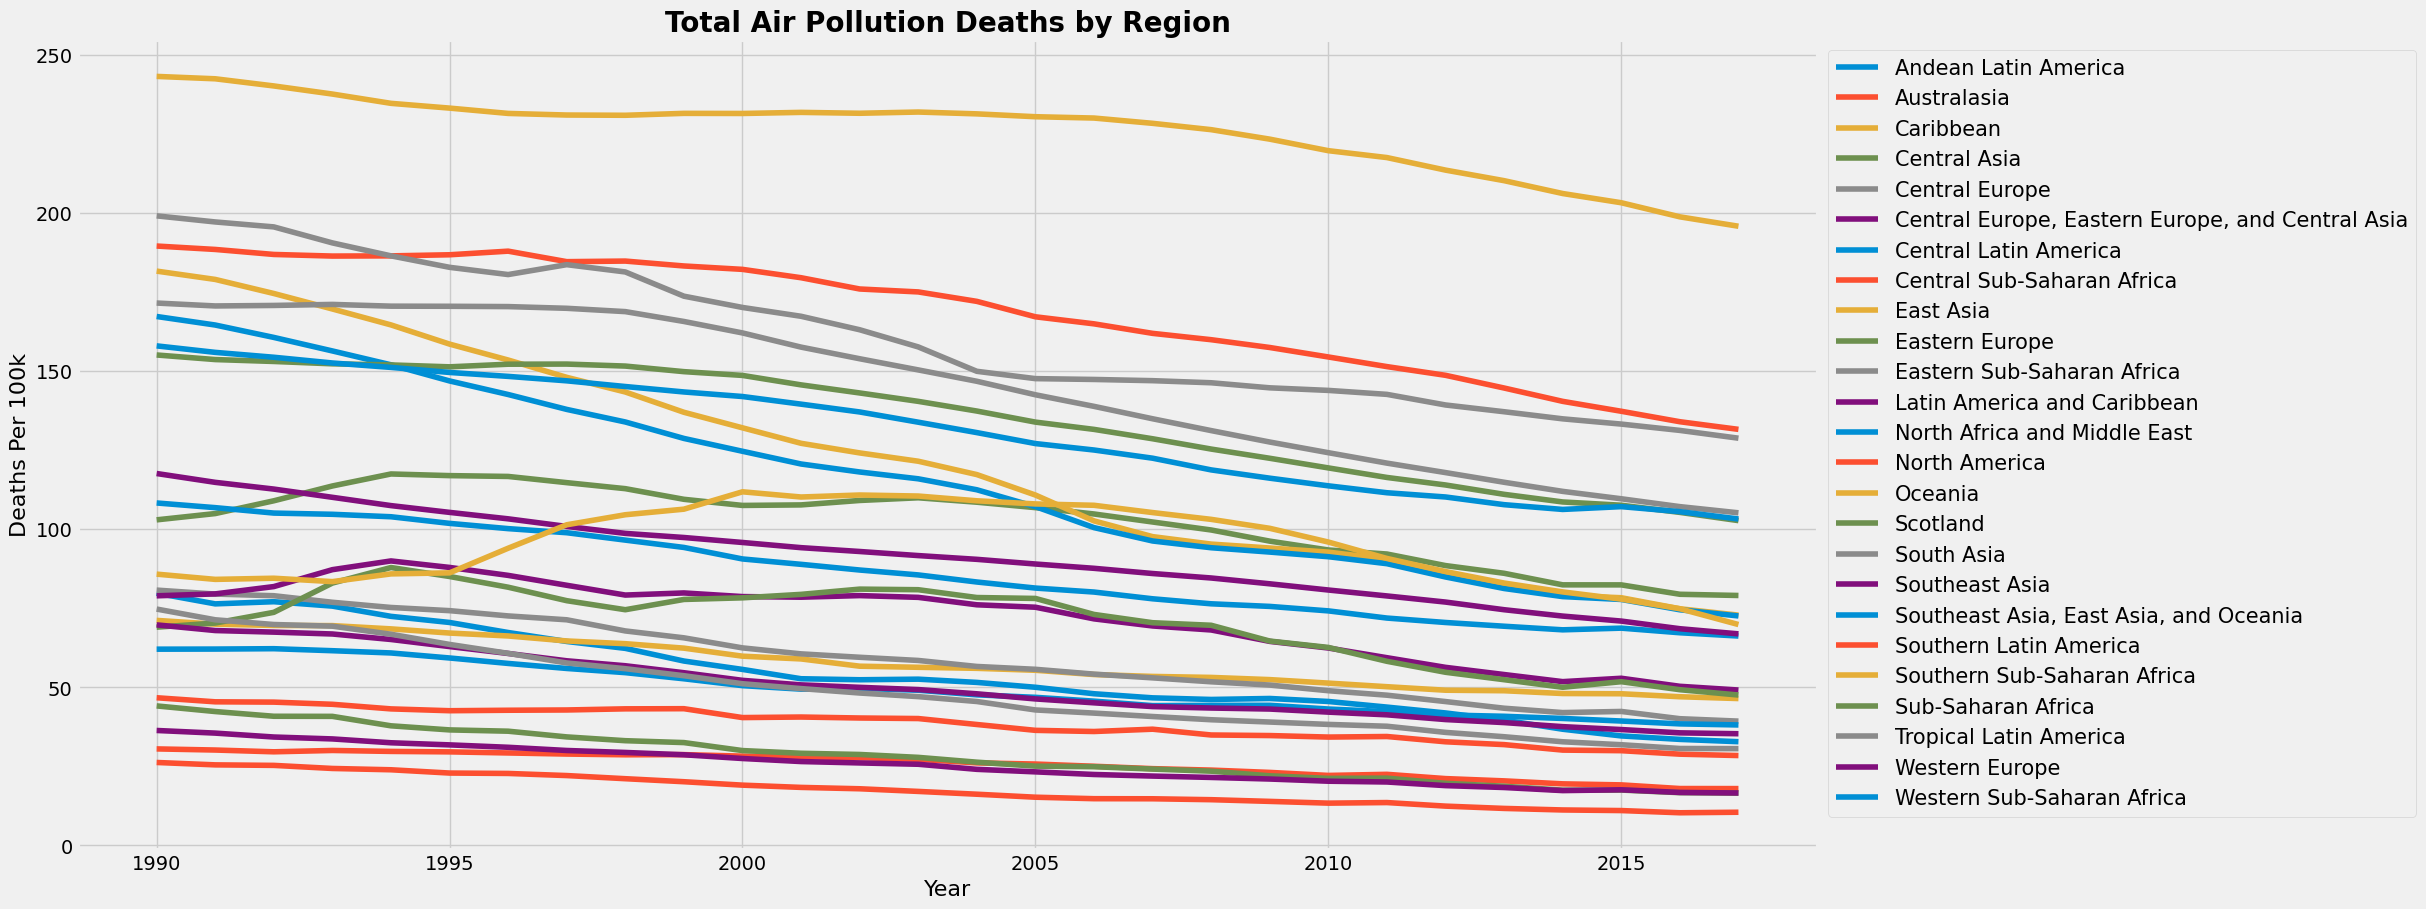

In [11]:
plt.figure(figsize=(20,10))  # Increasing the plot size

# Using a loop to add lines for each region
for r in region:
    plt.plot(regions[regions['Entity'] == r].groupby('Year').mean().iloc[:,0], label = r)

plt.xlabel('Year', size=16)  # Labeling the x-axis
plt.ylabel('Deaths Per 100k', size=16)  # Labeling the y-axis
plt.title('Total Air Pollution Deaths by Region', size=20,fontfamily='sans-serif', fontweight='bold')  # Adding a title
plt.legend(bbox_to_anchor=(1,1), loc="upper left", prop={'size': 15})
plt.style.use('fivethirtyeight')  # Using a plot style to include gridlines

Machine Learning


The plots above demonstrate a very apparent negative linear trend. Because of this, we'll train a linear regression model on the data. We will not be using these models for predictions, so we will not split the data into train and test sets yet.

In [12]:
from sklearn.linear_model import LinearRegression  # Importing the linear regression library

lr_model = LinearRegression()  # Creating the linear regression model instance
lr_slopes = []  # Initiating an empty list to store slopes
lr_intercepts = []  # Initiating an empty list to store intercepts
lr_scores = []  # Initiating an empty list to store scores

# Using a loop to train and test every region
for r in region:
    X = regions[regions['Entity'] == r].iloc[:,1].values.reshape(-1,1)  # Assigning years to the 'X' variable
    y = regions[regions['Entity'] == r].iloc[:,2].values.reshape(-1,1)  # Assinging deaths to the 'y' variable
    lr_model.fit(X, y)  # Training the model
    lr_slopes.append(round(lr_model.coef_[0][0], 2))  # Adding the model's slope to the list
    lr_intercepts.append(round(lr_model.intercept_[0], 2))  # Adding the model's intercept to the list
    lr_scores.append(round(lr_model.score(X, y), 2))  # Adding the model's score to the list

# Converting our lists to a dataframe
lr_region = pd.DataFrame({'Region': region, 'Slope': lr_slopes, 'Intercept': lr_intercepts, 'Score': lr_scores})
lr_region.sort_values(by='Slope').reset_index(drop=True)  # Sorting the dataframe by slope

,Region,Slope,Intercept,Score
0,East Asia,-4.23,8600.32,0.98
1,"Southeast Asia, East Asia, and Oceania",-3.63,7384.33,0.99
2,Eastern Sub-Saharan Africa,-2.85,5849.92,0.96
3,South Asia,-2.70,5578.92,0.97
4,Central Sub-Saharan Africa,-2.24,4649.25,0.94
5,Western Sub-Saharan Africa,-2.21,4551.08,0.99
6,Sub-Saharan Africa,-2.12,4383.13,0.94
7,Southeast Asia,-1.76,3610.33,0.99
8,Andean Latin America,-1.70,3467.53,0.97
9,North Africa and Middle East,-1.70,3491.42,0.99


In [13]:
# Assigning years to the 'X' variable and total deaths to the 'y' variable for convenience
X = countries['Year'].unique().reshape(-1,1)
y = countries.groupby('Year').mean().iloc[:,0].values

# Calculating the index to split the data into train (80%) and test (20%) sets
split_i = int(len(y)*0.8) + 1

# Splitting the data into train and test sets
X_train = X[:split_i]
X_test = X[split_i:]
y_train = y[:split_i]
y_test = y[split_i:]

# Fitting a linear regression model on our train set
lr_model.fit(X_train, y_train)

# Calculating and displaying the model's score (R-square) against our test set
round(lr_model.score(X_test, y_test), 2)

/var/folders/v4/xgc8jrh510g08njwg__q53b80000gn/T/ipykernel_23670/3138675726.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y = countries.groupby('Year').mean().iloc[:,0].values


0.73

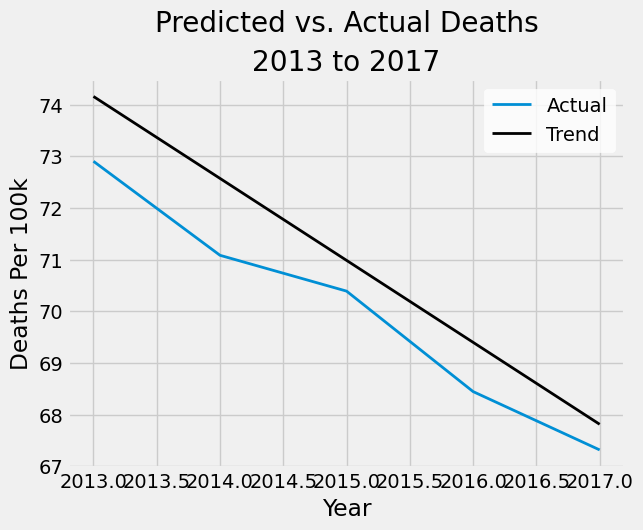

In [14]:
# Using our model to predict y-values from our test set's x-values
y_pred = lr_model.predict(X_test)

plt.plot(X_test, y_test, label='Actual', linewidth=2)  # Adding the actual deaths data to the plot
plt.plot(X_test, y_pred, label='Trend', c='black', linewidth=2)  # Adding the predicted deaths trendline to the plot
plt.title('Predicted vs. Actual Deaths\n2013 to 2017', linespacing=1.5,
         fontfamily='sans-serif')  # Adding a title
plt.xlabel('Year')  # Labeling the x-axis
plt.ylabel('Deaths Per 100k')  # Labeling the y-axis
legend = plt.legend(frameon=1, loc='best')  # Adding the legend and assigning it to a variable
frame = legend.get_frame()  # Assigning the legend's frame to a variable
frame.set_color('white')  # Setting the background color of the legend

Knowing how a linear regression model performs, we will now fit it using the entire unsplit dataset and make predictions for the future (the 'future' in this case being 2018 and beyond).



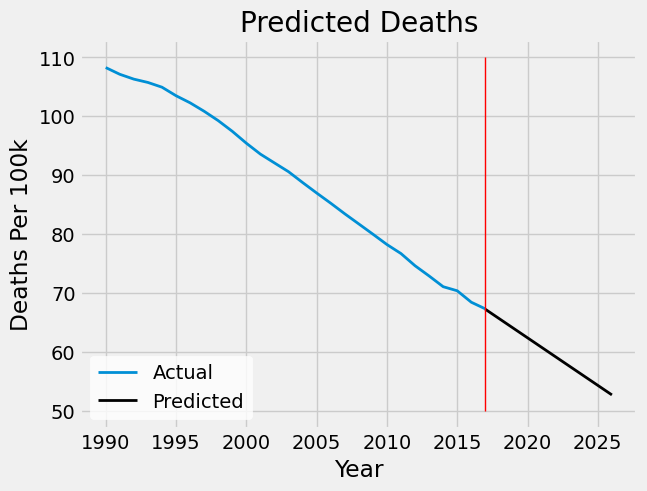

In [15]:
# Fitting the model on the entire dataset
lr_model.fit(X, y)

# Defining our x-values for the future
X_future = np.array(range(2017,2069)).reshape(-1,1)

# Predicting 50 years into the future
y_pred = lr_model.predict(X_future)

# Converting the predictions into a dataframe
pred_df = pd.DataFrame(list(zip([x[0] for x in X_future], y_pred)), columns = ['Year', 'Prediction'])

# Plotting existing data with predictinos for the next 10 years
plt.plot(X, y, label='Actual', linewidth=2)  # Adding line for the actual deaths
plt.plot(pred_df['Year'].iloc[:10,], pred_df['Prediction'].iloc[:10,],
         c='black', label='Predicted', linewidth=2)  # Adding line for the predicted deaths
plt.vlines(x=2017, ymin=50, ymax=110, color='red', linewidths = 1)  # Adding vertical line marking the present
plt.xlabel('Year')  # Labeling the x-axis
plt.ylabel('Deaths Per 100k')  # Labeling the y-axis
plt.title('Predicted Deaths', fontfamily='sans-serif')  # Adding a title
plt.legend(loc='lower left')  # Adding the legend
plt.style.use('fivethirtyeight')  # Using a plot style to include gridlines
legend = plt.legend(frameon=1, loc='lower left')  # Adding the legend and assigning it to a variable
frame = legend.get_frame()  # Assigning the legend's frame to a variable
frame.set_color('white')  # Setting the background color of the legend

As a last observation, we can review the predictions we made for the next 50 years to see when our model predicts deaths to drop to zero.



In [16]:
pred_df

,Year,Prediction
0,2017,67.252166
1,2018,65.637059
2,2019,64.021951
3,2020,62.406844
4,2021,60.791736
5,2022,59.176629
6,2023,57.561521
7,2024,55.946414
8,2025,54.331306
9,2026,52.716198
